# Green AI project : Water polution

## I - Importations

In [466]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

import warnings

from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split ,GridSearchCV, cross_val_score, cross_val_predict

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.filterwarnings("ignore")

## II - Adding the dataset

### a - Adding the datasets

In [467]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
target = pd.read_csv("Target.csv")
submission = pd.read_csv("Submission.csv")

### b - Concatenate the datasets 

In [468]:
df = pd.concat([train, test])
targets = pd.concat([target, submission])

df['polution'] = targets['polution_clf']
df = df.drop(columns = ['Unnamed: 0'])
df = df.drop(columns= ['period'])
df.head()

df_copy = df


## III -  Data cleaning

### a - Informations about the dataset

Shape of the dataframe

In [469]:
print("DataFrame shape : ",df.shape)

DataFrame shape :  (3660, 17)


Printing the columns

In [470]:
print(df.columns)

Index(['code', 'year', 'id', 'Country', 'tourists', 'venue', 'rate', 'food',
       'glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste',
       'waste_recycling', 'polution'],
      dtype='object')


Description of the dataset

In [471]:
df.describe()

,year,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
count,3660.000000,3.660000e+03,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000,3660.000000
mean,2008.656831,5.569954e+07,0.090984,11.070253,31.853109,8.529104,3.086691,24.146068,19.697694,10.506295,0.094820,0.833948,23.062085,0.404098
std,0.937363,2.304268e+07,0.561277,28.400648,8.886749,2.974285,0.883262,6.262395,4.261491,4.215245,0.582198,2.556819,4.803606,0.490784
min,2005.000000,5.300380e+05,0.000000,0.000000,14.180000,2.200000,1.380000,0.000000,6.100000,1.450000,0.000000,0.000000,0.760000,0.000000
25%,2008.000000,5.094169e+07,0.000000,0.000000,32.000000,8.000000,3.000000,26.000000,18.900000,9.000000,0.000000,0.000000,22.260000,0.000000
50%,2009.000000,7.117635e+07,0.000000,0.000000,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,22.260000,0.000000
75%,2009.000000,7.117635e+07,0.000000,0.000000,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,22.260000,1.000000
max,2017.000000,7.117635e+07,7.000000,87.158924,62.300000,21.400000,9.200000,44.050000,37.830000,22.900000,4.000000,19.180000,47.830000,1.000000


### b - Searching for missing values

Print the missing values per columns

In [472]:
def cheking_for_missing_values() : 
    missing_values = df.isnull().sum()
    print("\nTotal missing values in each column:")
    print(missing_values)

cheking_for_missing_values()


Total missing values in each column:
code                0
year                0
id                  0
Country            17
tourists            0
venue               0
rate                0
food                0
glass               0
metal               0
other               0
paper               0
plastic             0
leather             0
green_waste         0
waste_recycling     0
polution            0
dtype: int64


Drop the missing values and print the result

In [473]:
df = df.dropna()
cheking_for_missing_values()


Total missing values in each column:
code               0
year               0
id                 0
Country            0
tourists           0
venue              0
rate               0
food               0
glass              0
metal              0
other              0
paper              0
plastic            0
leather            0
green_waste        0
waste_recycling    0
polution           0
dtype: int64


### c - Encode the string values

##### 1 - Encode the Country column

In [474]:
# We create a mapping of the countries and add the column 'Country_mapped' to the dataset
countries = df['Country'].unique()
mapping_country = {value: i+1 for i, value in enumerate(countries)}
df['Country_mapped'] = df['Country'].map(mapping_country)

# Then we insert it next to the 'Country' column and drop the 'Country' column
colonne = df.pop('Country_mapped')
df.insert(4, 'Country_mapped', colonne)
df = df.drop(columns= ['Country'])

df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,EEA_3161-03-3,2009,FRGR0220,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0
1,EEA_3161-05-5,2009,FRDR179,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0
2,EEA_3161-01-1,2009,FRDR174,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0
3,EEA_3161-05-5,2009,FRDR174,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,1
4,EEA_3161-03-3,2009,FRGR0173,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0


##### 2 - Encode the 'id' and 'code' column

In [475]:
le = LabelEncoder()

df['id'] = le.fit_transform(df['id'])
df['code'] = le.fit_transform(df['code'])

df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,leather,green_waste,waste_recycling,polution
0,2,2009,917,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0
1,3,2009,518,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0
2,0,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0
3,3,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,1
4,2,2009,902,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,22.26,0


### d - Drop any duplicate

In [476]:
df.drop_duplicates(inplace=True)

### e - Delete the extrems values

##### 1 - Boxplot

In [477]:
subset_df = df[['rate', 'food', 'glass', 'metal', 'other', 'paper', 'plastic', 'leather', 'green_waste', 'waste_recycling']]

fig = px.box(subset_df, title='Highlighting outliers')
fig.update_layout(xaxis_title='Variable', yaxis_title='Value')
fig.show()

##### 2 - Delete extrem values

We decide to exclude the countries in deleting the extrem values so that we keep country diversity

We exclude the polution because it's the target value

We exclude the venue, leather and rate because if we don't, the value we get for every row is 0

In [478]:
Q1 = df.drop(columns=['Country_mapped','polution','venue','leather','rate']).quantile(0.10)
Q3 = df.drop(columns=['Country_mapped','polution','venue','leather','rate']).quantile(0.90)
IQR = Q3 - Q1

# Utilisez la méthode loc pour filtrer les lignes sur les colonnes spécifiques
df = df.loc[~((df.drop(columns=['Country_mapped','polution','venue','leather','rate']) < (Q1 - 1.5 * IQR)) | (df.drop(columns=['Country_mapped','polution','venue','leather','rate']) > (Q3 + 1.5 * IQR))).any(axis=1)]

##### 3 - Find if we need to delete columns that have only one value 

df_copy is a copy of the df before we did changes on it to compare

Here we can see that the leather column has only one value now so we must drop it 

In [479]:
venue_before = df_copy['venue'].unique()
venue_after = df['venue'].unique()

leather_before = df_copy['leather'].unique()
leather_after = df['leather'].unique()

rate_before = df_copy['rate'].unique()
rate_after = df['rate'].unique()

print(f'Venue before : {venue_before} and after {venue_after}\nLeather before {leather_before} and after {leather_after}\nRate before {rate_before} and after {rate_after}')

Venue before : [0. 3. 5. 2. 4. 1. 6. 7.] and after [0. 3. 5. 2. 4. 1. 6. 7.]
Leather before [0.   1.96 4.   0.4  3.6 ] and after [0.]
Rate before [ 0.         87.15892368 10.92804972 11.09062195 22.00044929 11.09255897
 21.86710188 21.17940436 22.19835663 11.01392873 21.93875376] and after [ 0.         87.15892368 11.09062195 21.93875376]


In [480]:
df = df.drop(columns=['leather'])

#### 4 - Boxplot after taking out the extrem values

Now we do the same plot as just before to se the difference

In [481]:
subset_df = df[['rate', 'food', 'glass', 'metal', 'other', 'paper', 'plastic', 'green_waste', 'waste_recycling']]

fig = px.box(subset_df, title='Highlighting outliers')

fig.update_layout(xaxis_title='Variable', yaxis_title='Value')

fig.show()

##  IV - Data visualisation

### a - Take back the Country column

In [482]:
# Create a function to inverte the mapping we did in the cleaning step
def invert_mapping(mapping):
    return {v: k for k, v in mapping.items()}

# Invert the mapping using the function we just did
inverted_mapping = invert_mapping(mapping_country)

# Create a columns with the countries using the mapping 
Country = [inverted_mapping[valeur] for valeur in df['Country_mapped']]

#Adding the new column to the dataset df
df['Country'] = Country

df.head()


,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,green_waste,waste_recycling,polution,Country
0,2,2009,917,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France
1,3,2009,518,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France
2,0,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France
3,3,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,1,France
4,2,2009,902,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France


### b - Pie of countries

In [483]:
# We initialize a variable to get the count of every country
count_country = df['Country'].value_counts()

# Then we plot the pie
fig = px.pie(count_country, values=count_country.values, names=count_country.index, 
             title='Diagram of the country repartition')

fig.show()

What can we get from this plot : 

The majority of our dataset is about polution in France and United Kingdom. 
Maybe the fact that we don't have a lot of informations about some countries can impact the predictions. 

We can manage it with : 
- Seeing a plot of the mean value of polution per country 
- See if the predictions accurate on the less represented countries

In [484]:
df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,green_waste,waste_recycling,polution,Country
0,2,2009,917,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France
1,3,2009,518,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France
2,0,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France
3,3,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,1,France
4,2,2009,902,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0,France


### c - Visualisation of the mean pollution for each country with indicated the number of values per country 

In [485]:
polution = df[df['polution'] == 1]
no_polution = df[df['polution'] == 0]

fig = px.histogram(df, x='Country', color='polution', color_discrete_map={1: 'red', 0: 'green'},
                   title='Histogram of the number of polluted and not polluted water per country',
                   labels={'polution': 'Polution Status', 'Country': 'Country'},
                   nbins=len(df['Country'].unique()))  # Use nbins to ensure each country gets its own bin

# Customize the layout
fig.update_layout(xaxis_title='Country', yaxis_title='Count of Polluted and Not Polluted')

# Show the figure
fig.show()


In [486]:
average_pollution = df.groupby('Country')['polution'].mean().reset_index()
total_mean_pollution = df['polution'].mean()

fig = px.bar(average_pollution, x='Country', y='polution',
             title='Mean pollution per country')

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Country', yaxis_title='Mean pollution')

fig.add_hline(y=total_mean_pollution, line_dash="dash", line_color="red", annotation_text=f"Total Mean: {total_mean_pollution:.2f}",
              annotation_position="top right")

fig.show()

### d - Average polution by years

In [487]:
average_pollution_by_year = df.groupby('year')['polution'].mean().reset_index()

fig = px.line(average_pollution_by_year, x='year', y='polution', 
              title='Pollution evolution by years', markers=True)

fig.update_layout(xaxis_title='Year', yaxis_title='Mean pollution', showlegend=False)

fig.show()

year_counts = df['year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Count']

fig = px.pie(year_counts, values='Count', names='Year', 
             title='Year distribution', hole=0.4)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

### e - Barplot type of polution

In [488]:
categories = ['glass', 'food', 'metal', 'other', 'paper', 'plastic', 'green_waste']
color = ['#264653', '#226D68', '#2A9D8F', '#E9C46A', '#F4A261', '#C23028', '#77221D']

average_by_country = df.groupby('Country')[categories].mean().reset_index()

fig = px.bar(average_by_country, x='Country', y=categories,
             color_discrete_sequence=color, title='Average Waste by Country')

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Country', yaxis_title='Average Waste',
                  legend_title='Categories')

fig.show()

In the visualizations, it's evident that "food" and "other" categories dominate across countries, indicating their widespread presence. Additionally, the absence of "green_waste" in some countries is noteworthy. Notably, "metal" appears consistently in all countries but at relatively low proportions, emphasizing its universal but less prevalent occurrence.

## V - Preparation for modeling

### a - Deleting the Country column used fot the visualisations

In [489]:
df = df.drop(columns= ['Country'])
df.head()

,code,year,id,Country_mapped,tourists,venue,rate,food,glass,metal,other,paper,plastic,green_waste,waste_recycling,polution
0,2,2009,917,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0
1,3,2009,518,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0
2,0,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0
3,3,2009,515,1,71176346.0,3.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,1
4,2,2009,902,1,71176346.0,0.0,0.0,32.0,10.0,3.0,26.0,20.0,9.0,0.0,22.26,0


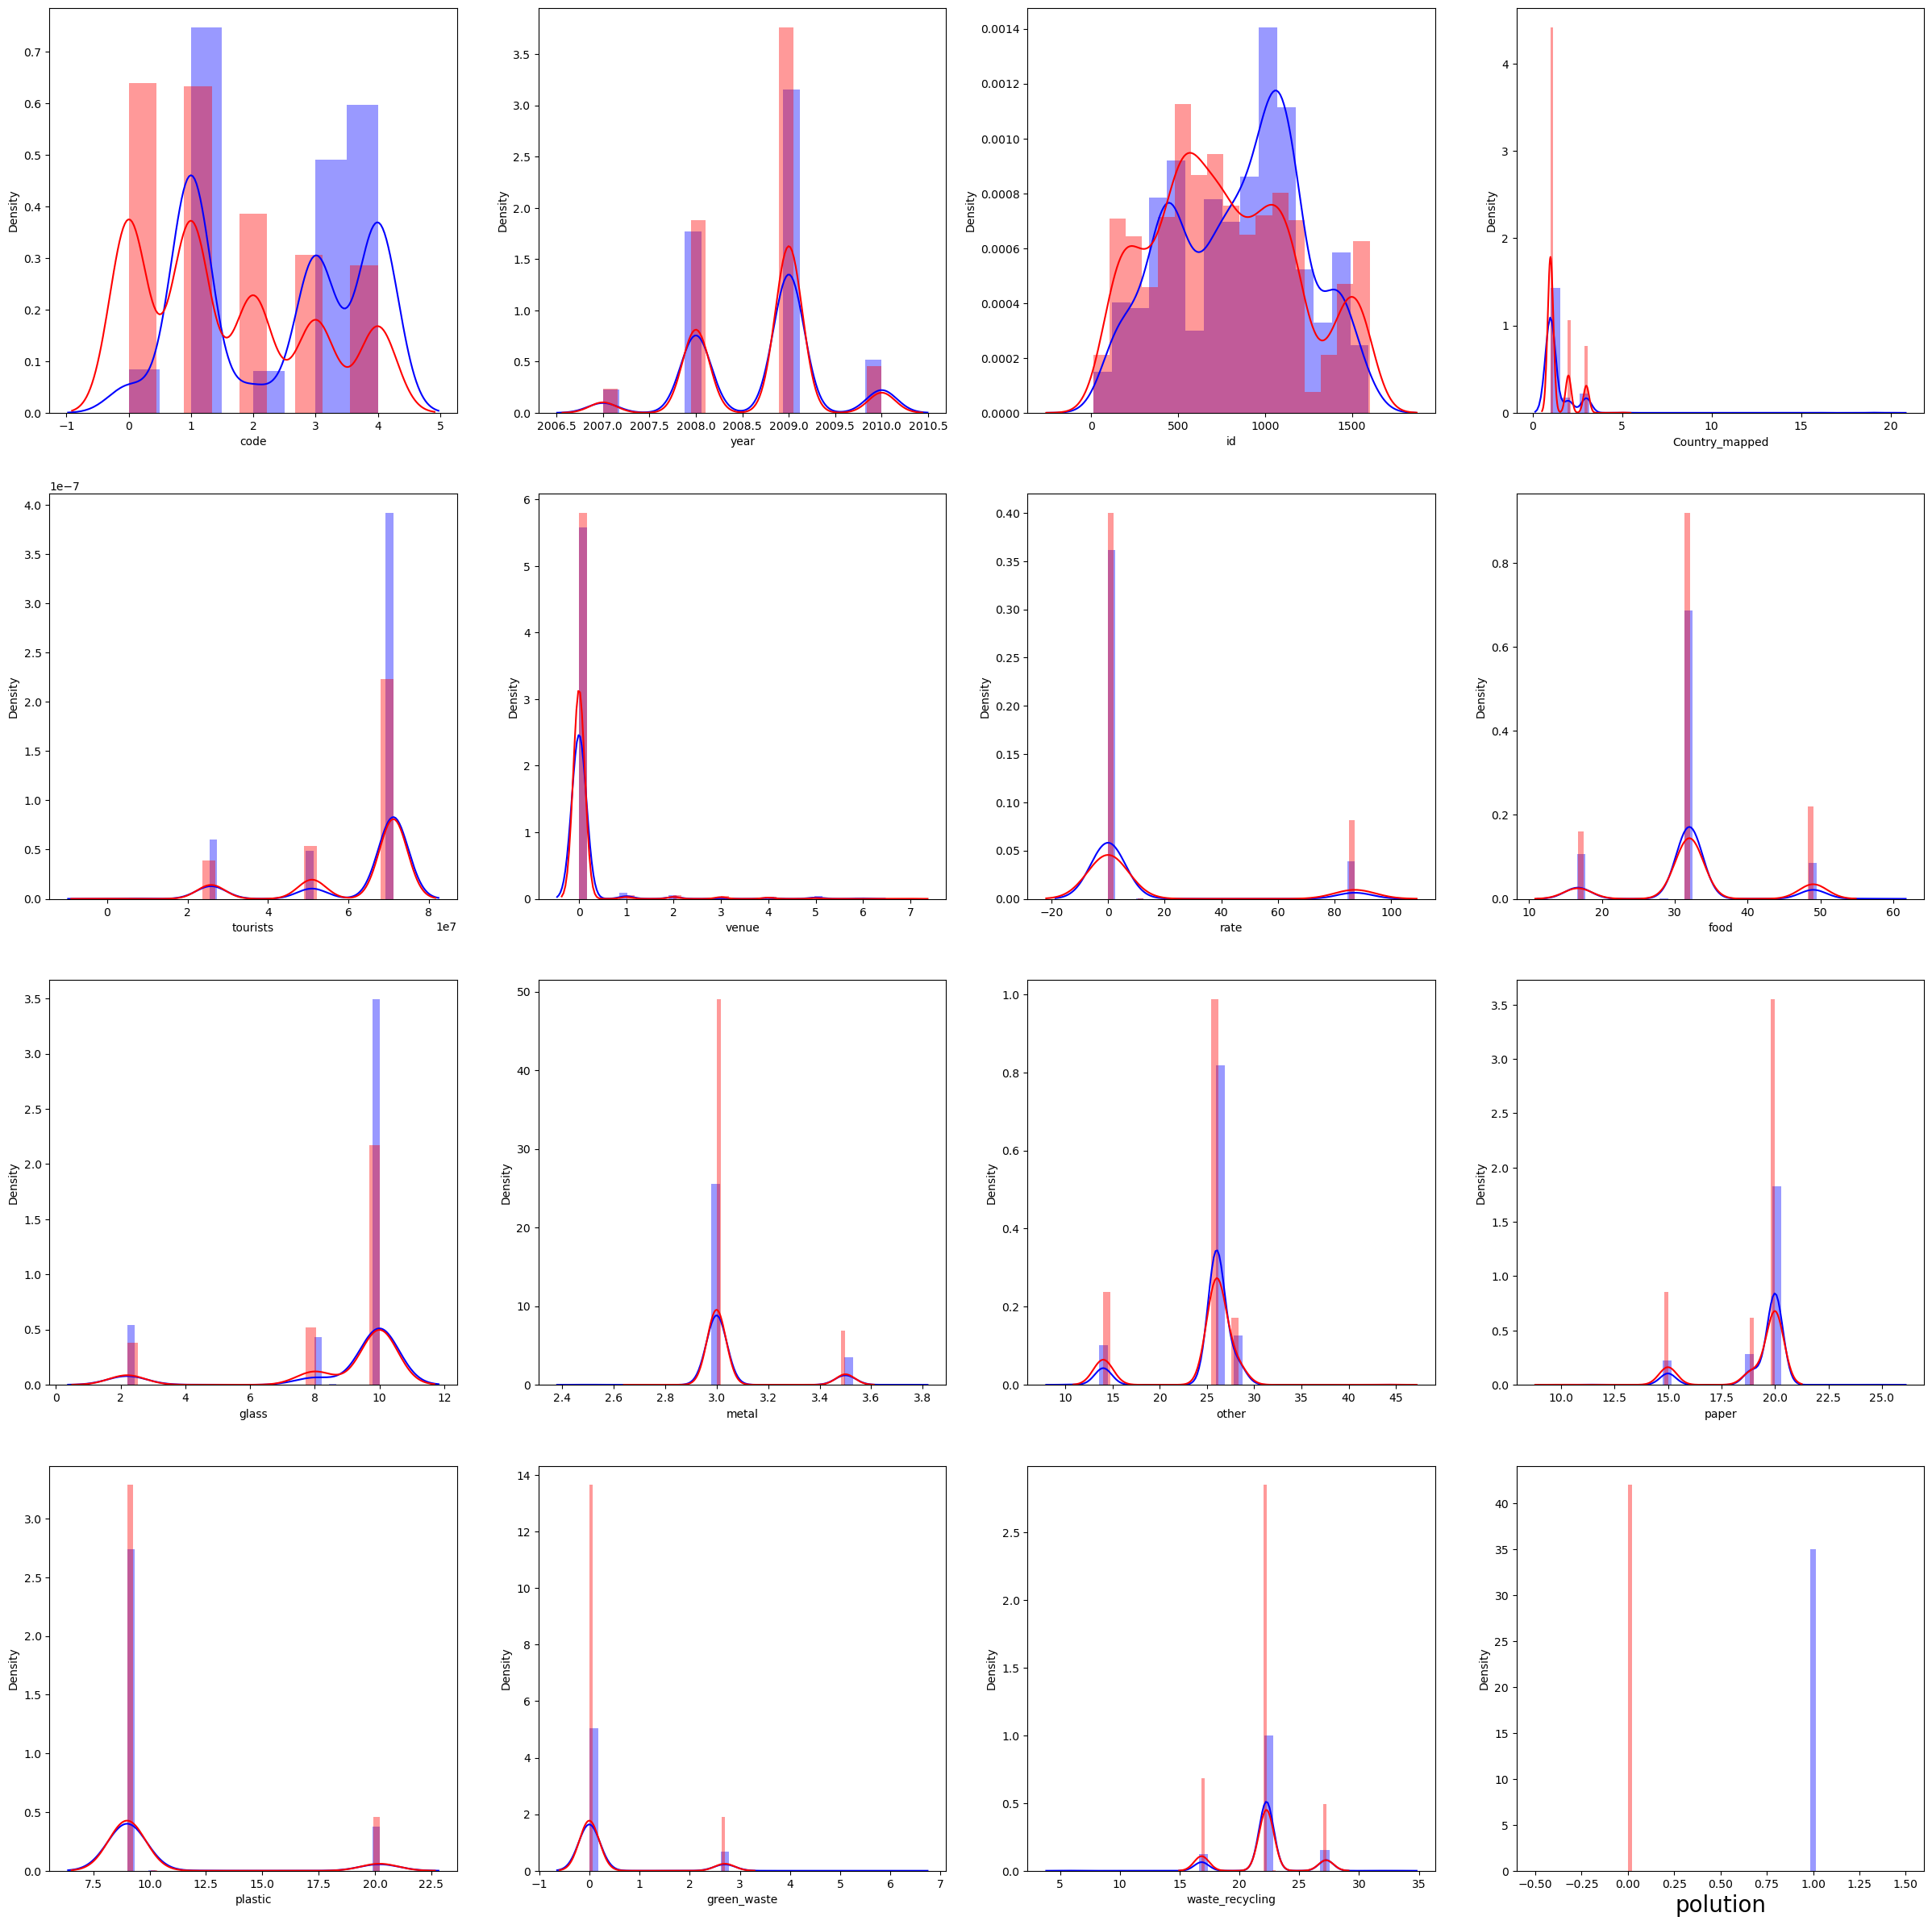

In [490]:
pd.set_option('use_inf_as_na', True)
corr_polution = list(set(df.columns))
poluted = df.loc[df["polution"] == 1]
not_poluted = df.loc[df["polution"] == 0]
features = corr_polution

color = sns.color_palette("pastel")
fig, ax1 = plt.subplots(4,4, figsize=(30,30))
k = 0
columns = list(df.columns)
for i in range(4):
    for j in range(4):
        sns.distplot(poluted[columns[k]], ax = ax1[i][j], color = 'blue', label = 'poluted')
        sns.distplot(not_poluted[columns[k]], ax = ax1[i][j], color = 'red', label = 'not poluted')
        plt.xlabel(columns[k],size=20)
        k += 1
plt.show()

### b - Heatmap

<Axes: >

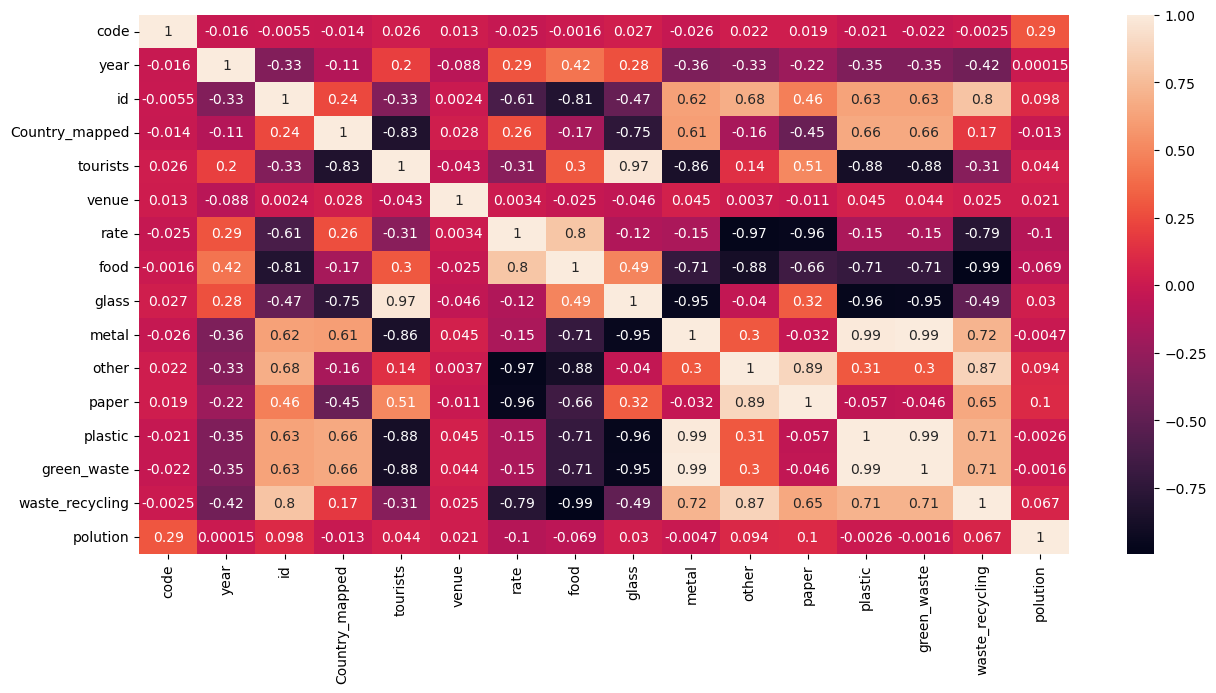

In [491]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(),annot=True)

### b - Delete the columns with high correlation

In [492]:
correlation_matrix = df.corr()

target = df['polution']

correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.80:
            colname = correlation_matrix.columns[i]
            correlated_columns.add(colname)
            
print(f'The columns we have to drop are : {correlated_columns}')
            
df_no_corr = df.drop(columns=correlated_columns)

df['polution'] = target

The columns we have to drop are : {'paper', 'green_waste', 'other', 'plastic', 'tourists', 'glass', 'metal', 'waste_recycling', 'food'}


### e - Standardisation

In [493]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standardized = scaler.fit_transform(df)

In [494]:
target = df['polution']
df = df.drop(columns=['polution'])

In [495]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_standardized,target,train_size = 0.80,random_state=42)

## VI - Modeling

In [496]:
#model = LogisticRegression(C=1, max_iter = 10000, solver='liblinear', random_state=100)
#model.fit(x_train, y_train)
#
#y_pred = model.predict(x_test)
#
#accuracy = accuracy_score(y_test, y_pred)
#print(f"Precision with {accuracy*100} %")
#
#param_log={
#    'penalty':['l1', 'l2', 'elasticnet', None],
#    'tol':[i/10 for i in range(11)],
#    'C':[i for i in range(1,51)],
#    
#    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
#
#grid_search = GridSearchCV(estimator=model, param_grid=param_log, cv=4)
#grid_search.fit(x_train, y_train)

In [497]:
model = RandomForestClassifier()  # Remplace par le modèle approprié
# Tu peux utiliser GridSearchCV pour l'optimisation des hyperparamètres
# param_grid = {'param_name': [param_value1, param_value2, ...]}
# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# model = grid_search.best_estimator_

# Entraîner le modèle
model.fit(x_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = model.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

# Imprimer les résultats
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 1.0
Confusion Matrix:
[[376   0]
 [  0 243]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       243

    accuracy                           1.00       619
   macro avg       1.00      1.00      1.00       619
weighted avg       1.00      1.00      1.00       619



In [498]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Exemple : Nombre d'estimateurs pour RandomForest
    'max_depth': [None, 10, 20],       # Exemple : Profondeur maximale pour RandomForest
    'min_samples_split': [2, 5, 10],   # Exemple : Nombre minimum d'échantillons pour la division pour RandomForest
    # Ajoute d'autres hyperparamètres selon le modèle que tu utilises
}

base_model = RandomForestClassifier()  # Remplace par le modèle approprié

# Utiliser GridSearchCV avec la validation croisée
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy')  # cv=5 signifie une validation croisée à 5 plis
grid_search.fit(x_train, y_train)

# Obtenir les meilleurs hyperparamètres
best_params = grid_search.best_params_

# Utiliser le modèle avec les meilleurs hyperparamètres
best_model = grid_search.best_estimator_

# Entraîner le modèle avec les meilleurs hyperparamètres
best_model.fit(x_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = best_model.predict(x_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, predictions)

# Imprimer les résultats
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy with Best Model: {accuracy}')

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy with Best Model: 1.0


In [499]:
predictions = best_model.predict(x_test)

# Obtenir le rapport de classification
class_report = classification_report(y_test, predictions)

# Imprimer le rapport de classification
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      1.00      1.00       243

    accuracy                           1.00       619
   macro avg       1.00      1.00      1.00       619
weighted avg       1.00      1.00      1.00       619



In [500]:
base_model = RandomForestClassifier()  # Remplace par le modèle approprié

# Utiliser la validation croisée avec 5 plis (cv=5, par exemple)
cross_val_scores = cross_val_score(base_model, df, target, cv=5, scoring='accuracy')

# Afficher les scores de validation croisée
print("Cross-Validation Scores:", cross_val_scores)

# Afficher la moyenne des scores
print("Mean Cross-Validation Score:", np.mean(cross_val_scores))

Cross-Validation Scores: [0.65912763 0.66828479 0.65857605 0.61488673 0.56957929]
Mean Cross-Validation Score: 0.6340908972086725


In [501]:
base_model = RandomForestClassifier()  # Remplace par le modèle approprié

# Utiliser cross_val_predict pour obtenir les prédictions sur l'ensemble de données
cross_val_predictions = cross_val_predict(base_model, df, target, cv=5)

# Créer une matrice de confusion basée sur les prédictions de la validation croisée
conf_matrix = confusion_matrix(target, cross_val_predictions)

# Imprimer la matrice de confusion
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[1340  484]
 [ 655  612]]
